# **March Major Project on Covid Tweets Sentiment Analysis using NLP**

Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# **Reading The Dataset in Pandas with 'latin-1' encoding**

In [ ]:
data = pd.read_csv('Corona_NLP (2).csv',encoding='latin-1')

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
data.shape

(41157, 6)

In [ ]:
data.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

# **Null Values  Detection in the Data**

In [ ]:
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

There are 8590 Null Values in the coulmn Location. Even though Location cloumn having null values we are not going to drop or imputate the null values because we are not considering The Feature Location for Model Building.

In [ ]:
data.duplicated().sum()

0

There are No Duplicated Rows in the Dataset

In [ ]:
data.shape

(41157, 6)

Conversion of Data Types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
data['TweetAt'] = pd.to_datetime(data['TweetAt'])
data.Location = data.Location.astype('string')
data.OriginalTweet = data.OriginalTweet.astype('string')
data.Sentiment = data.Sentiment.astype('string')

In [ ]:
data.Sentiment.unique()

<StringArray>
['Neutral', 'Positive', 'Extremely Negative', 'Negative',
 'Extremely Positive']
Length: 5, dtype: string

In [ ]:
data['Sentiment'] = data['Sentiment'].replace({"Extremely Negative":"Negative",'Extremely Positive':'Positive'})

In [ ]:
data.Sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [ ]:
# Review Frquency Count
vc_df = pd.DataFrame(data['Sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].replace({1 : 'Positive' , 0: 'Negative',2:'Neutral'}) 
vc_df

,Sentiment,Count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


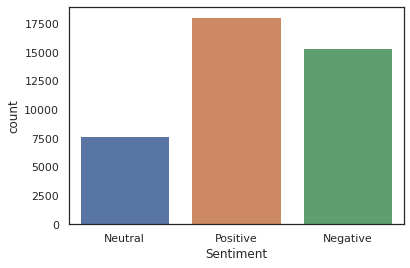

In [ ]:
sns.countplot(data['Sentiment'])

In [ ]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [ ]:
unidf = return_unique_values(data)
print(unidf)

        Features  Uniques
0       UserName    41157
1     ScreenName    41157
2       Location    12220
3        TweetAt       30
4  OriginalTweet    41157
5      Sentiment        3


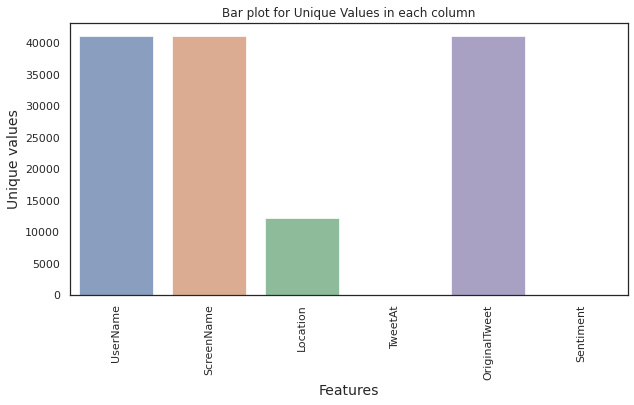

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

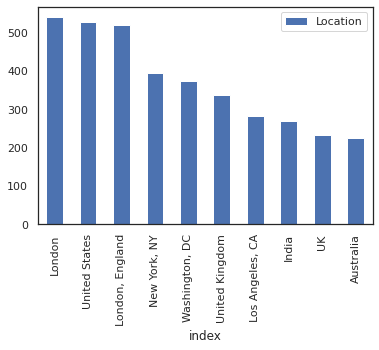

In [ ]:
fig = data.Location.value_counts().reset_index().head(10).plot(kind='bar',x='index',y='Location')
fig

# **Pre-Processing**

In [ ]:
data.OriginalTweet.unique()

<StringArray>
[                                                                                                                                                                                                                   '@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
                                                                                      'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
                                                                                                                                                                                                'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
  "My

Sentence Tokenisation :- Removing URL'S for feature OriginalTweet

In [ ]:
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
data['OriginalTweet']

0                         @MeNyrbie @Phil_Gahan @Chrisitv 
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

all the URL's Deleted from the OriginalTweet

In [ ]:
# Replacing punctuations with space
data['OriginalTweet_processed'] = data['OriginalTweet'].str.replace("[^a-zA-Z0-9]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#Removing the short words from the OriginalTweets
data['OriginalTweet_processed'] = data['OriginalTweet_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

Converting all the words into lower cases

In [ ]:
#Converting the all words in OriginalTweet into Lowercases as python is case sensitive programing language
data['OriginalTweet_processed'] = [review.lower() for review in data['OriginalTweet_processed']]

In [ ]:
#OriginalTweet_processed after removing puntuations,html tags,converting into lower case words.
data['OriginalTweet_processed']

0                             menyrbie phil gahan chrisitv
1        advice talk your neighbours family exchange ph...
2        coronavirus australia woolworths give elderly ...
3        food stock not the only one which empty please...
4        ready supermarket during the covid19 outbreak ...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint not provided citing covid r...
41154    you know getting tough when kameronwilds ratio...
41155    wrong that the smell hand sanitizer starting t...
41156    tartiicat well new used rift are going for 700...
Name: OriginalTweet_processed, Length: 41157, dtype: object

# **Removing stop words**

1.  Import nltk
2.  download stopwords from nltk
3.  if there are any frequently occuring words in data you may add them into stop words


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['covid','covid2019','covid19','coronavirus','covid19ph','toilet paper',' Corona','grocery store','amp']

stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
data['OriginalTweet_processed'] = [remove_stopwords(r) for r in data['OriginalTweet_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['OriginalTweet_processed']

0                             menyrbie phil gahan chrisitv
1        advice talk neighbours family exchange phone n...
2        australia woolworths give elderly disabled ded...
3        food stock one empty please panic enough food ...
4        ready supermarket outbreak paranoid food stock...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing related del...
41154    know getting tough kameronwilds rationing toil...
41155             wrong smell hand sanitizer starting turn
41156    tartiicat well new used rift going 700 amazon ...
Name: OriginalTweet_processed, Length: 41157, dtype: object

# **Lemmatization with POS Tagging**




1.  Download Averagerd perceptron tagger
2.  from nltk download wordnet
3.  from nltk.stem import WordNetLemmatizer
4.  from nltk.corups import wordnet('corpus means collection of')
5.  find the parts of speech for words in the data
6.  after finding the parts of speech convert detailed POS into shallow POS 



In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


data['OriginalTweet_processed'] = data['OriginalTweet_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data['OriginalTweet_processed'].iloc[2050:2085]

2050    pivot quickly change key digital transformatio...
2051    company combinator w20 demo day part consumer ...
2052    gaza supermarket still spike price panic yet p...
2053    san francisco line get grocery store open 12pm...
2054    love time part wait line get grocery store lik...
2055    love time part wait line get grocery store lik...
2056    online shopping may benefit short term supply ...
2057    get ready crisis may cripple orlando economy c...
2058          small town scotland supermarket shelf empty
2059    rapid outbreak india sbi ecowrap analyse deman...
2060    dear client associate still available assist h...
2061    sure betfred last business ask rent holiday co...
2062    bubbaprog go grocery store leave governor bob ...
2063                                  rundown supermarket
2064    food shopper chiswick london forced wait long ...
2065    coronavirusoutbreak point local business massi...
2066    state police museum close tourist due still of...
2067    panic 

# **Exploratory Data Analysis**

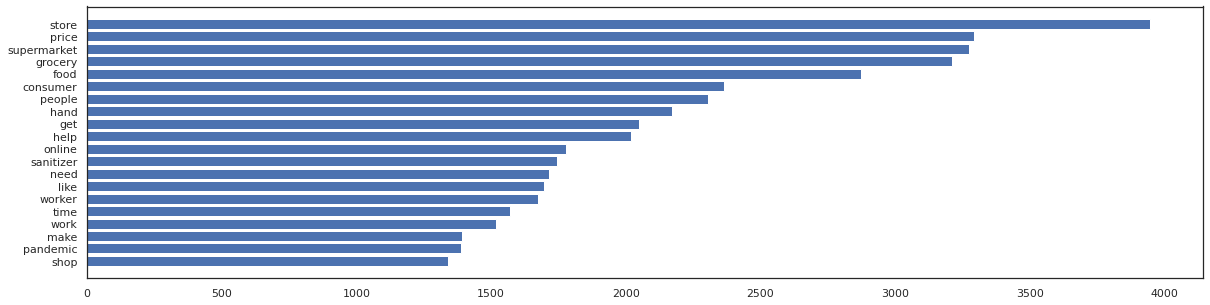

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_data = data.loc[data['Sentiment'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_data['OriginalTweet_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

# **Word Cloud**

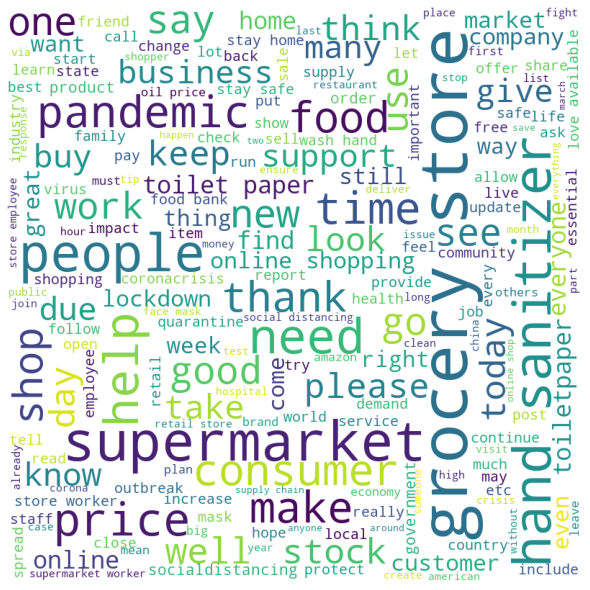

In [ ]:
from wordcloud import WordCloud
word_cloud_df = data.loc[data['Sentiment'] == 'Positive',:]
all_words = ' '.join([text for text in word_cloud_df['OriginalTweet_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
data = data.drop(columns = ['UserName','ScreenName','Location','TweetAt','OriginalTweet'])
data.head()

,Sentiment,OriginalTweet_processed
0,Neutral,menyrbie phil gahan chrisitv
1,Positive,advice talk neighbours family exchange phone n...
2,Positive,australia woolworth give elderly disable dedic...
3,Positive,food stock one empty please panic enough food ...
4,Negative,ready supermarket outbreak paranoid food stock...


# **Count Vectorization**

In [ ]:
# Importing module
#from sklearn.feature_extraction.text import CountVectorizer

# Creating sparse matrix of top 2500 tokens
#tfidf = CountVectorizer(max_features=2500)
#X = tfidf.fit_transform(data.OriginalTweet_processed).toarray()
#y = data.Sentiment.replace({'Neutral':2 ,'Positive' : 0, 'Negative' : 1}).values   
#featureNames = tfidf.get_feature_names()

# **TF-IDF Vectorization**

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating sparse matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(data.OriginalTweet_processed).toarray()
y = data.Sentiment.replace({'Neutral':2 ,'Positive' : 0, 'Negative' : 1}).values   
featureNames = tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Spliting The Dataset into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
y

array([2, 0, 0, ..., 0, 2, 1])

In [ ]:
X_train.shape, X_test.shape

((32925, 2500), (8232, 2500))

In [ ]:
accuracy_scores = []

# **Multinomial Naïve Bayes Classification**



In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifierm = MultinomialNB()
classifierm.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifierm.predict(X_test)

In [ ]:
accuracy_scores.append(classifierm.score(X_test,y_test))

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Multinomial Naïve Bayes classificaion score:  0.6625364431486881
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      3553
           1       0.71      0.70      0.70      3127
           2       0.71      0.17      0.28      1552

    accuracy                           0.66      8232
   macro avg       0.68      0.57      0.57      8232
weighted avg       0.67      0.66      0.63      8232



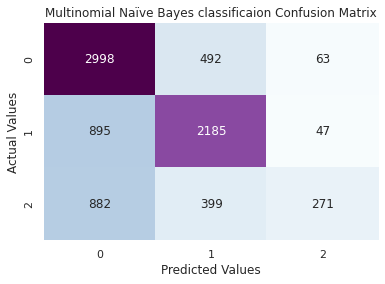

In [ ]:
print('Multinomial Naïve Bayes classificaion score: ',accuracy_score(y_test,y_pred))
cm_reg =my_confusion_matrix(y_test, y_pred, 'Multinomial Naïve Bayes classificaion Confusion Matrix')

# **RandomForest Classification**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

## Testing the model on test set
y_pred = clf.predict(X_test)

In [ ]:
accuracy_scores.append(clf.score(X_test,y_test))

RandomForest Classification Accuracy Score:  0.45396015549076774
              precision    recall  f1-score   support

           0       0.44      1.00      0.61      3553
           1       0.92      0.06      0.12      3127
           2       0.00      0.00      0.00      1552

    accuracy                           0.45      8232
   macro avg       0.45      0.35      0.24      8232
weighted avg       0.54      0.45      0.31      8232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


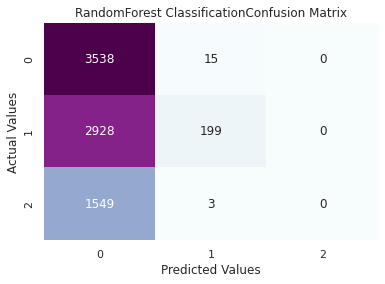

In [ ]:
print('RandomForest Classification Accuracy Score: ',accuracy_score(y_test,y_pred))
cm_reg =my_confusion_matrix(y_test, y_pred, 'RandomForest ClassificationConfusion Matrix')

# **KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

neigh.fit(X_train, y_train)

## Testing the model on test set
y_pred = neigh.predict(X_test)

In [ ]:
accuracy_scores.append(neigh.score(X_test,y_test))

KNN Classifier Accuracy Score:  0.3498542274052478
              precision    recall  f1-score   support

           0       0.51      0.33      0.40      3553
           1       0.49      0.23      0.31      3127
           2       0.22      0.64      0.33      1552

    accuracy                           0.35      8232
   macro avg       0.41      0.40      0.35      8232
weighted avg       0.45      0.35      0.35      8232



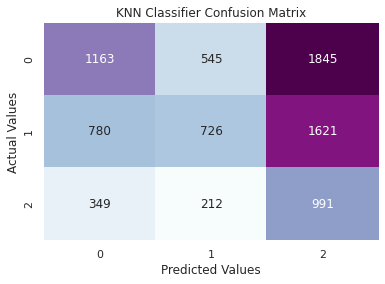

In [ ]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred))
cm_reg =my_confusion_matrix(y_test, y_pred, 'KNN Classifier Confusion Matrix')

# **Conclusion**

In [ ]:
accuracy_scores

[0.6625364431486881, 0.45396015549076774, 0.3498542274052478]

From All The Above Three Classification Models 

Multinomial Naïve Bayes Classifier is Giving The Highest Accuracy Score than The other 2 models Random Forest Classifier and KNN Classifier so I'm  building The model with  Multinomial Navie Bayes Classifier

# **Feature Importance**

In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(clf.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
99,0.056225,panic
60,0.051471,free
123,0.049125,scam
74,0.042104,help
164,0.038690,well
...,...,...
56,0.000020,flour
81,0.000017,isolation
103,0.000012,policy
155,0.000004,trader


In [ ]:
featureImportance.sort_values(by='Importance')

,Importance,word
1,0.000000,zone
155,0.000004,trader
103,0.000012,policy
81,0.000017,isolation
56,0.000020,flour
...,...,...
164,0.038690,well
74,0.042104,help
123,0.049125,scam
60,0.051471,free
